In [2]:
from imdb import IMDb
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from plotting import master_plot

In [1]:
path = '/Users/austinbenny/Documents/python/movie_budget_ratings/the-movies-dataset/movies_metadata.csv'

In [3]:
df=pd.read_csv(path)
movie='Avatar'
idx=df[df['title']==movie].index.tolist()
pop=df.loc[idx,'popularity']
print(pop)

14551    185.070892
Name: popularity, dtype: float64


In [4]:
id='tt0848228'
df[df['imdb_id']==id].index.tolist()

[17818]

In [5]:
df=pd.read_csv(path)
df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)
df = df[(df[['budget','revenue','popularity','vote_average']] != 0).all(axis=1)]
z_scores=np.abs(stats.zscore(df[['budget','revenue','popularity','vote_average']]))
new_df=df[(z_scores < 3.0).all(axis=1)]
df=new_df
df.columns.values

array(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'id', 'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'], dtype=object)

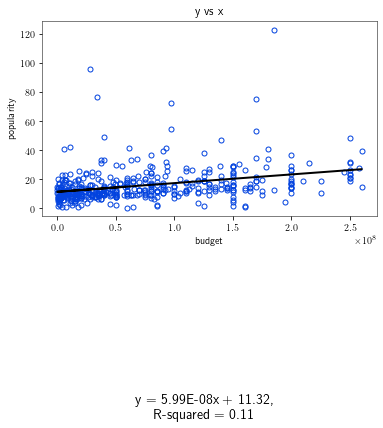

In [6]:
# plt.scatter(df.loc[:,'budget'],df.loc[:,'popularity'],alpha=0.5)
# plt.xlabel('budget');plt.ylabel('popularity')
master_plot(df.loc[:,'budget'],df.loc[:,'popularity'],linestyle='none',savefig=False,trendline=True,\
            xlabel='budget',ylabel='popularity',legend=False)

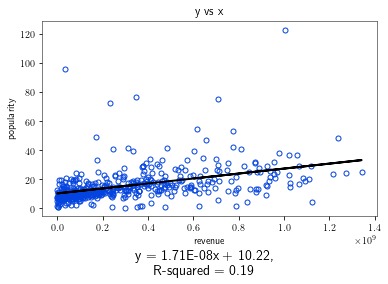

In [14]:
master_plot(df.loc[:,'revenue'],df.loc[:,'popularity'],linestyle='none',savefig=False,trendline=True,\
            xlabel='revenue',ylabel='popularity',legend=False)

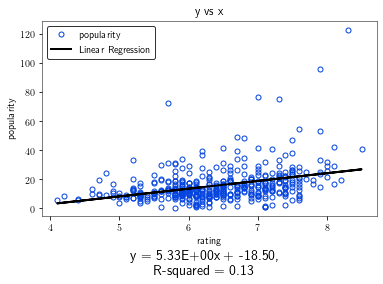

In [16]:
master_plot(df.loc[:,'vote_average'],df.loc[:,'popularity'],linestyle='none',savefig=False,trendline=True,\
            xlabel='rating',ylabel='popularity')

## What this means?

the tmdb popularity values for the cleared up df arent really functions of the rating, revenue, or budget

In [18]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

In [20]:
# examining highest popularities
df=df.sort_values(['popularity'],ascending=False)
df=df.loc[:,['popularity','title','overview','release_date','budget','revenue','vote_average']]

In [22]:
# compare opening weekend

opening=pd.read_csv("/Users/austinbenny/Documents/python/movie_budget_ratings/IMDB_data/imdb_data_final.csv",usecols=['Opening Weekend United States'])

popularity=pd.read_csv('/Users/austinbenny/Documents/python/movie_budget_ratings/the-movies-dataset/movies_metadata.csv',usecols=['popularity'])

In [24]:
len(popularity),len(opening)

(45463, 2067)

In [26]:
final_title=df_small.loc[20,'title']
row=df_large.loc[df_large['title']==final_title].index.tolist()
type(row[0])
df_large.loc[row,'popularity']

147    18.761467
Name: popularity, dtype: float64

In [41]:
# match titles
df_small =pd.read_csv("/Users/austinbenny/Documents/python/movie_budget_ratings/IMDB_data/imdb_data_final.csv",usecols=['Opening Weekend United States','title','runtimes'])
df_large = pd.read_csv('/Users/austinbenny/Documents/python/movie_budget_ratings/the-movies-dataset/movies_metadata.csv',usecols=['popularity','title','runtime'])


In [42]:
explore_df =pd.DataFrame(columns=['title','opening','popularity'])
for index in range(len(df_small.loc[:,'title'])):
    print('index = ',index)
    final_title=df_small.loc[index,'title']
    print('final title = ',final_title)
    row=df_large.loc[df_large['title']==final_title].index.tolist()
    print('row = ',row)

    if len(row)>1:
        for dupe_idx in row:
            print('dupe index = ',dupe_idx)
            if df_large.loc[dupe_idx,'runtime'] == df_small.loc[index,'runtimes']:
                print('found correct index')
                explore_df = explore_df.append({\
                'title' : final_title\
                ,'opening' : df_small.loc[index,'Opening Weekend United States']\
                ,'popularity':df_large.loc[dupe_idx,'popularity']} , ignore_index=True)
                break
    else:
        explore_df = explore_df.append({\
        'title' : final_title\
        ,'opening' : df_small.loc[index,'Opening Weekend United States']\
        ,'popularity':df_large.loc[row[0],'popularity']} , ignore_index=True)





row =  [23691]
index =  1811
final title =  Deliver Us from Evil
row =  [11344, 23716, 24850, 24950]
dupe index =  11344
dupe index =  23716
found correct index
index =  1812
final title =  Sex Tape
row =  [23736]
index =  1813
final title =  The Purge: Anarchy
row =  [23747]
index =  1814
final title =  Guardians of the Galaxy
row =  [23752]
index =  1815
final title =  The Expendables 3
row =  [23766]
index =  1816
final title =  Hercules
row =  [1495, 23771, 28084, 43067]
dupe index =  1495
dupe index =  23771
dupe index =  28084
dupe index =  43067
found correct index
index =  1817
final title =  Wish I Was Here
row =  [23782]
index =  1818
final title =  Step Up All In
row =  [23829]
index =  1819
final title =  The Hundred-Foot Journey
row =  [23876]
index =  1820
final title =  Jupiter Ascending
row =  [23895]
index =  1821
final title =  Teenage Mutant Ninja Turtles
row =  [3318, 23896]
dupe index =  3318
dupe index =  23896
found correct index
index =  1822
final title =  Let

In [43]:
type(explore_df.loc[0,'popularity'])

numpy.float64

In [44]:
# validate results - easy way
movie = 'Transformers: The Last Knight'

print('(opening = {}, popularity = {})'.format(df_small.loc[df_small.loc[df_small['title']==movie].index.tolist()[0],'Opening Weekend United States'],df_large.loc[df_large.loc[df_large['title']==movie].index.tolist()[0],'popularity'] ))


(opening = 44680073.0, popularity = 39.186819)


In [45]:
# remove outliers and 0
from movie_data_analysis_v4 import good_df
movie=good_df(explore_df)
df,_ = movie.remove_extrema()

Shape of df after invalid removal = (2028, 3)
Final shape =  (1974, 3)


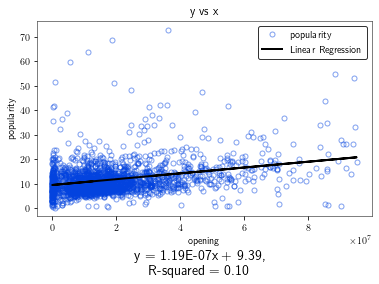

In [57]:
master_plot(df.loc[:,'opening'],df.loc[:,'popularity'],linestyle='none',savefig=False,trendline=True,\
            xlabel='opening',ylabel='popularity',marker='o',alpha=0.5)

In [50]:
# use opening as your pop var, edit plotting

In [7]:
len(df)

451